In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


In [58]:
df = pd.read_pickle('/Users/s0c02nj/Desktop/Face_attributes')

In [59]:
df.head()

,faceId,age,facialHair,glasses,gender,emotion,time,datetime,year,month,day,hour,minute,second
0,d46a8115-c6a4-4b81-9b48-d91c276bd23a,40.0,moustache,noGlasses,female,neutral,2019-12-20 15:52:31,2019-12-20 15:52:31,2019,12,20,15,52,31
0,017203ca-6f07-4fa6-99db-c0c883afe66c,46.0,moustache,noGlasses,male,neutral,2019-12-20 15:52:47,2019-12-20 15:52:47,2019,12,20,15,52,47
0,2ea7604f-2ed8-4d5f-838c-464451aa4f93,49.0,moustache,readingGlasses,female,neutral,2019-12-20 15:52:51,2019-12-20 15:52:51,2019,12,20,15,52,51
0,683566b0-5045-4bdf-bcdb-7c683a80536c,40.0,moustache,noGlasses,female,neutral,2019-12-20 15:52:54,2019-12-20 15:52:54,2019,12,20,15,52,54
0,cf6994f1-4a66-4e8d-b32c-63b221aa62e5,62.0,moustache,readingGlasses,female,neutral,2019-12-20 15:53:04,2019-12-20 15:53:04,2019,12,20,15,53,4


In [35]:
#df[df['facialHair'] == 'moustache']['gender'].value_counts()

In [36]:
df.shape

(74471, 14)

In [37]:
#2156/56951 * 100
df['day'].value_counts()

24    11187
22     9323
23     8764
21     8393
29     8007
28     6590
27     5548
26     5094
25     5046
20     4169
30     2350
Name: day, dtype: int64

In [38]:
#df['hour'] = df['time'].apply(lambda x : x.hour)

In [39]:
#df['hour'].unique()

Text(0.5, 1.0, 'Distribution of Age')

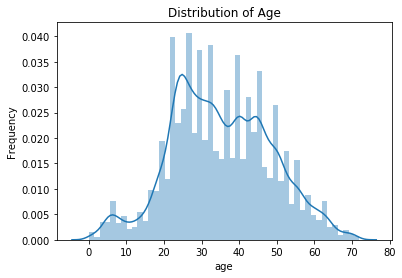

In [40]:
sns.distplot(df['age'])
plt.ylabel('Frequency')
plt.title('Distribution of Age')

(0, 100000)

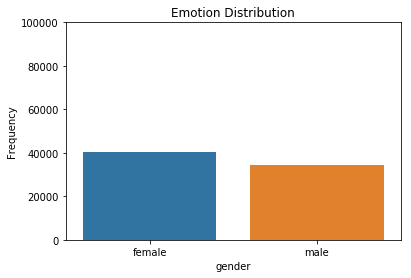

In [41]:
sns.countplot(df['gender'])
plt.ylabel('Frequency')
plt.title('Emotion Distribution')
plt.ylim(0,100000)

In [42]:
df['gender'].value_counts()

female    40153
male      34318
Name: gender, dtype: int64

Text(0.5, 1.0, 'Emotion Distribution')

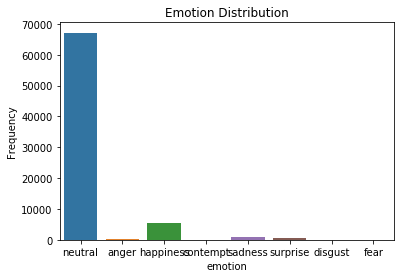

In [43]:
sns.countplot(df['emotion'])
plt.ylabel('Frequency')
plt.title('Emotion Distribution')

In [54]:
#sns.boxplot(x="month", y="emotion", data=pd.melt(df))

In [12]:
#df['emotion'].describe()

In [13]:
df_sub = df[df['emotion'] != 'neutral']

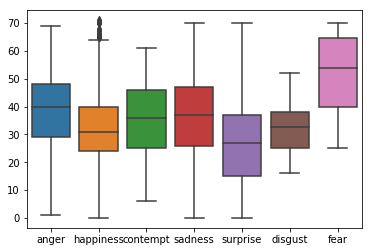

In [57]:
sns.boxplot(x = df_sub['emotion'].tolist() , y= df_sub['age'].tolist())

Text(0, 0.5, 'Age in years')

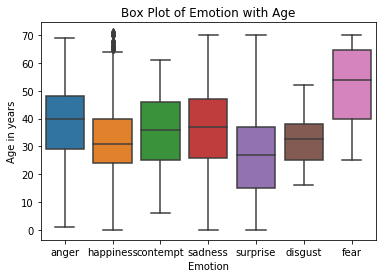

In [16]:
sns.boxplot(x = df_sub['emotion'].tolist() , y= df_sub['age'].tolist())
plt.title('Box Plot of Emotion with Age')
plt.xlabel('Emotion')
plt.ylabel('Age in years')

In [18]:
df_sub['age_bucket'] = df_sub['age'].apply(lambda x: 'age below 40' if x<40 else 'age above 40')

/Users/s0c02nj/anaconda2/envs/graph/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df_sub.head()

,faceId,age,facialHair,glasses,gender,emotion,time,datetime,year,month,day,hour,minute,second,age_bucket
0,4853fe11-3e0c-42aa-9824-72bcc2b24e37,65.0,moustache,noGlasses,male,anger,2019-12-20 15:56:58,2019-12-20 15:56:58,2019,12,20,15,56,58,age above 40
0,41b13543-6d56-420e-a08c-ceecf16634bf,44.0,moustache,readingGlasses,female,happiness,2019-12-20 15:56:58,2019-12-20 15:56:58,2019,12,20,15,56,58,age above 40
0,8ca97318-aef1-49b1-bbdc-76766dd45fe3,44.0,moustache,readingGlasses,female,happiness,2019-12-20 15:57:13,2019-12-20 15:57:13,2019,12,20,15,57,13,age above 40
0,7b1de0de-22fc-4a2f-beb5-a965c4dfbc12,33.0,moustache,noGlasses,female,happiness,2019-12-20 15:58:42,2019-12-20 15:58:42,2019,12,20,15,58,42,age below 40
0,ea290501-e680-4b37-a671-359513571bfa,44.0,moustache,noGlasses,female,contempt,2019-12-20 16:00:33,2019-12-20 16:00:33,2019,12,20,16,0,33,age above 40


In [56]:
df_sub['emotion'].value_counts()

happiness    5291
sadness      1002
surprise      560
anger         381
contempt       56
disgust        34
fear            4
Name: emotion, dtype: int64

In [20]:
a1 = pd.crosstab(df_sub['gender'],df_sub['emotion'],normalize=False)
a1

emotion,anger,contempt,disgust,fear,happiness,sadness,surprise
gender,,,,,,,
female,157,34,25,2,2808,786,309
male,224,22,9,2,2483,216,251


In [21]:
round(a1,2)

emotion,anger,contempt,disgust,fear,happiness,sadness,surprise
gender,,,,,,,
female,157,34,25,2,2808,786,309
male,224,22,9,2,2483,216,251


In [22]:
#chi2, p, dof, ex = chi2_contingency(obs, correction=False) 
chi2, p, dof, ex  = chi2_contingency(a1)

In [23]:
p

1.019614008281461e-53

In [1]:
len('Mahabharat')

10